# Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [101]:
df=pd.read_csv('dataset.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [103]:
df.shape

(303, 14)

In [105]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## observtion 
There is no missing values, catgorical values in data
for scaling data we will do leter

# Q2. Split the dataset into a training set (70%) and a test set (30%).

In [111]:
x=df.iloc[:,:-1]
y=df['target']

In [113]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


# Q2. Split the dataset into a training set (70%) and a test set (30%).

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [119]:
from sklearn.preprocessing import StandardScaler
scler=StandardScaler()
x_train=scler.fit_transform(x_train)
x_test=scler.transform(x_test)

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [123]:
model=RandomForestClassifier(n_estimators=100,max_depth=10)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
    
acc=accuracy_score(y_test,y_pred)
print(acc)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.8571428571428571
              precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.83      0.91      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



array([[35,  9],
       [ 4, 43]], dtype=int64)

# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [131]:
accuracy_defult=accuracy_score(y_test,y_pred)
print(accuracy_defult)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.8571428571428571
              precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.83      0.91      0.87        47

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



array([[35,  9],
       [ 4, 43]], dtype=int64)

## Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

In [69]:
feature_importances=model.feature_importances_
features_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

In [71]:
features_df

,Feature,Importance
0,age,0.083957
1,sex,0.041863
2,cp,0.111806
3,trestbps,0.073486
4,chol,0.072707
5,fbs,0.012132
6,restecg,0.019121
7,thalach,0.129378
8,exang,0.071815
9,oldpeak,0.119728


In [73]:
top_5_features = features_df.head(5)

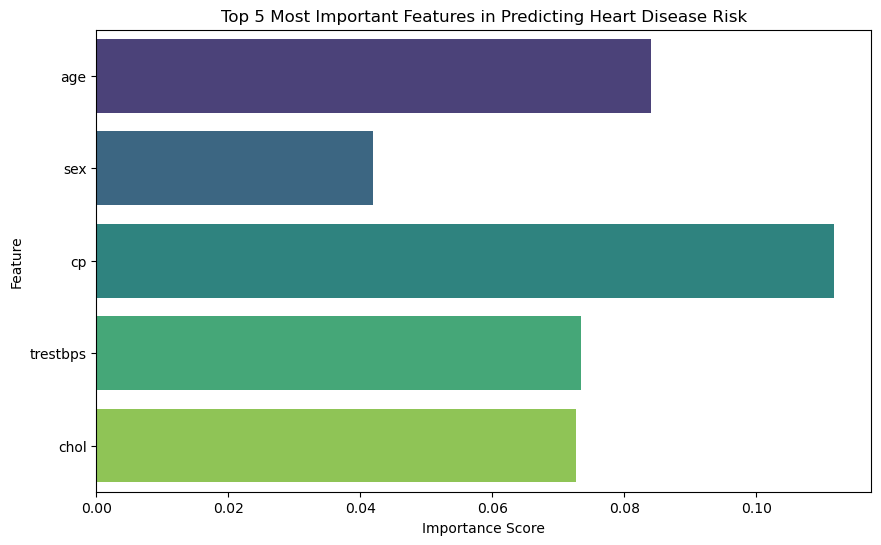

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_5_features, palette='viridis')
plt.title('Top 5 Most Important Features in Predicting Heart Disease Risk')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
# different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [82]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [86]:
gs=GridSearchCV(model,param_grid,cv=5,refit=True,verbose=3)

In [88]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.744 total time=   0.4s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.791 total time=   0.3s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.3s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.3s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.810 total time=   0.3s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.814 total time=   0.6s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.6s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [98]:
gs.best_params_


{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

model.set_params(** gs.best_params_)

In [96]:
y_pred=model.predict(x_test)
    
acc=accuracy_score(y_test,y_pred)
print(acc)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

0.8351648351648352
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        44
           1       0.81      0.89      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



array([[34, 10],
       [ 5, 42]], dtype=int64)

# Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

In [133]:
# Compare Performance
print("\nComparison of Default and Tuned Models:")
print(f"Default Model Accuracy: {accuracy_defult}")
print(f"Tuned Model Accuracy: {acc:.4f}")


Comparison of Default and Tuned Models:
Default Model Accuracy: 0.8571428571428571
Tuned Model Accuracy: 0.8571


# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [136]:
top_2_features = features_df.head(2)['Feature'].values

In [138]:
top_2_features

array(['age', 'sex'], dtype=object)

In [160]:

X_top2 = x[top_2_features]
x_train, X_test, y_train, y_test = train_test_split(X_top2, y, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

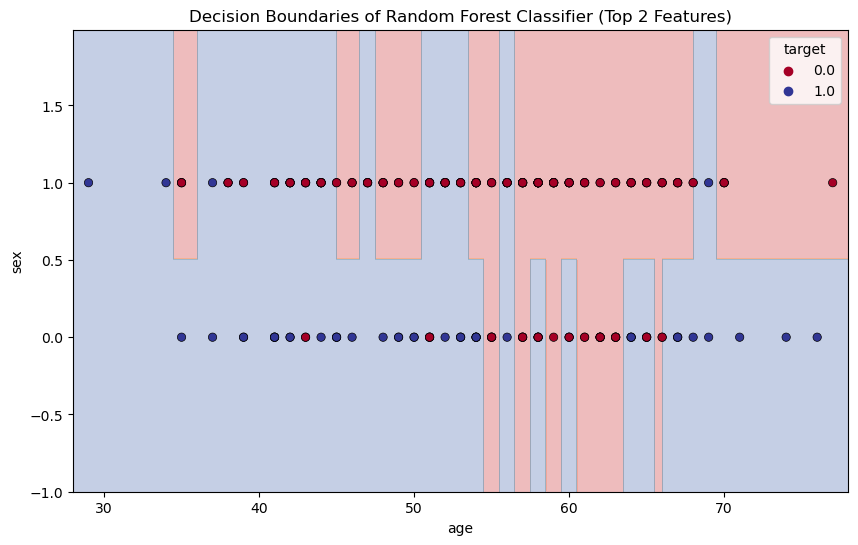

In [162]:
# Plot decision boundaries
def plot_decision_boundaries(X, y, model, ax):
    x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
    y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    sns.scatterplot(x=x.iloc[:, 0], y=x.iloc[:, 1], hue=y, palette='RdYlBu', ax=ax, edgecolor='k')

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))
plot_decision_boundaries(x_train, y_train, classifier, ax)
ax.set_title('Decision Boundaries of Random Forest Classifier (Top 2 Features)')
ax.set_xlabel(top_2_features[0])
ax.set_ylabel(top_2_features[1])
plt.show()
